# Task 5

# SALES PREDICTION USING PYTHON

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.drop('Unnamed: 0',axis = 1, inplace=True)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visulazation

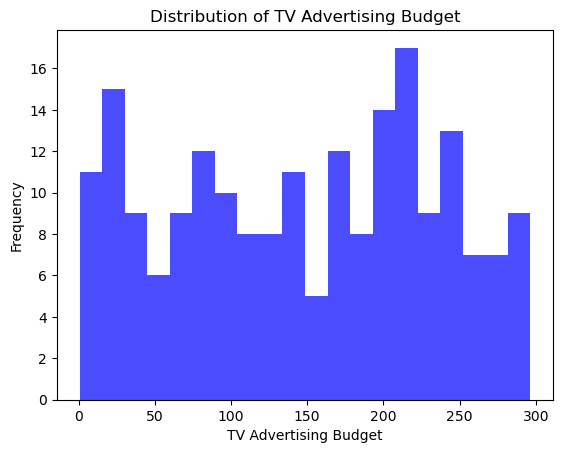

In [9]:
# Histogram for TV advertising budget
plt.hist(df['TV'], bins=20, color='blue', alpha=0.7)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of TV Advertising Budget')
plt.show()

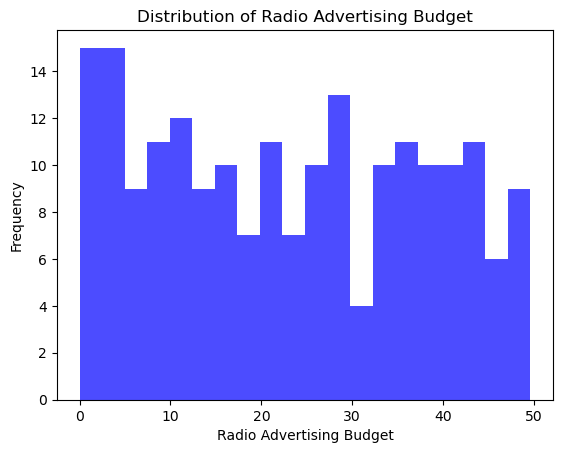

In [10]:
# Histogram for TV advertising budget
plt.hist(df['Radio'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Radio Advertising Budget')
plt.show()

# Similar histograms for Radio and Newspaper


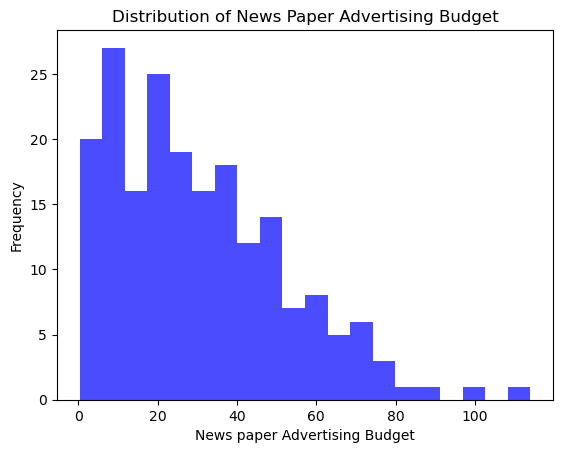

In [11]:
# Histogram for TV advertising budget
plt.hist(df['Newspaper'], bins=20, color='blue', alpha=0.7)
plt.xlabel('News paper Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of News Paper Advertising Budget')
plt.show()

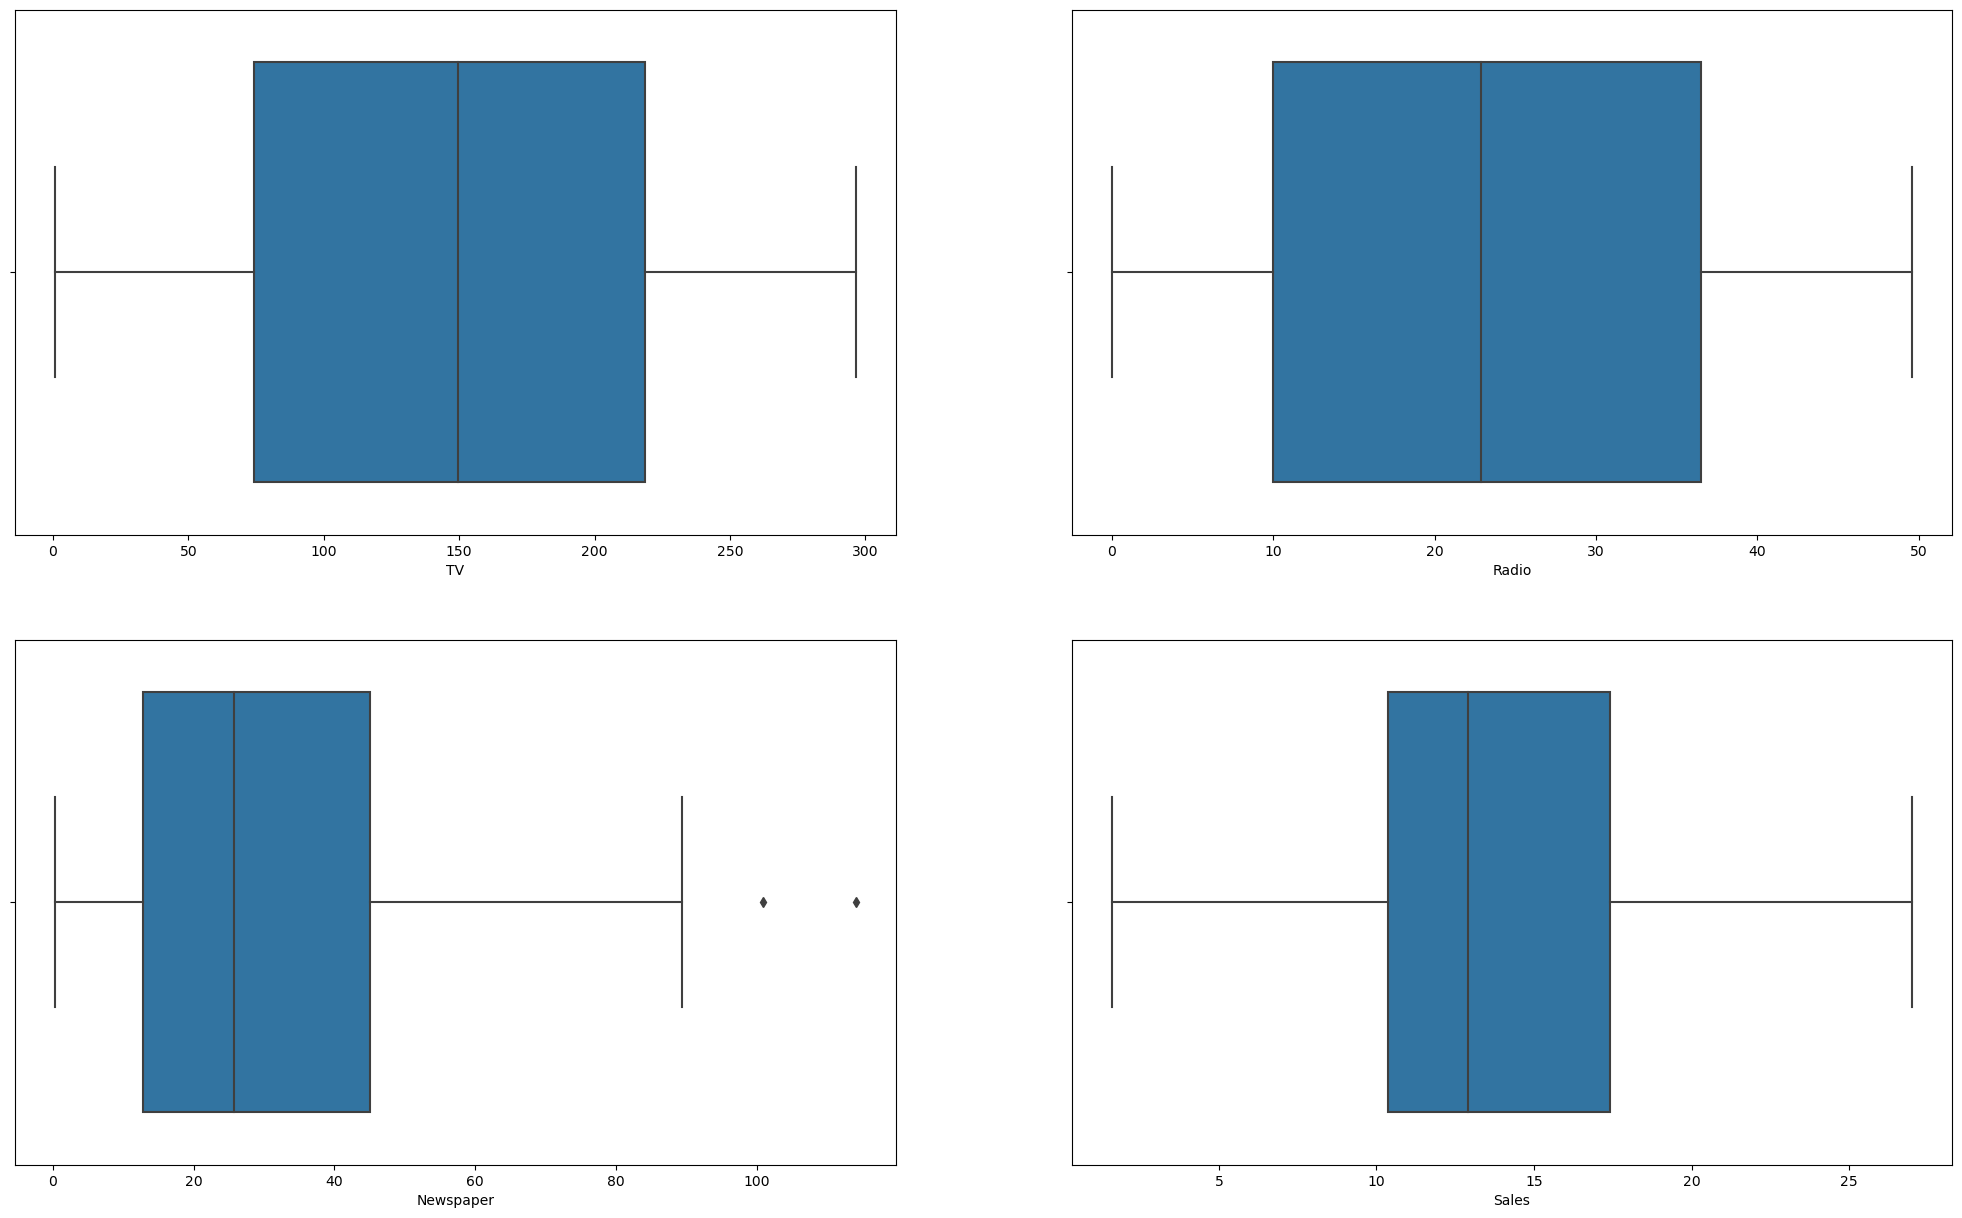

In [12]:
fig,ax = plt.subplots(2,2 ,figsize = (25,15))
for i,subplot in zip(df,ax.flatten()):
    sns.boxplot(df[i],ax = subplot)

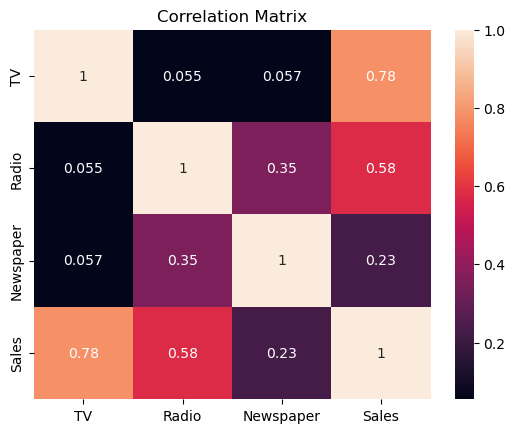

In [13]:
# Calculate the correlation matrix
correlation = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

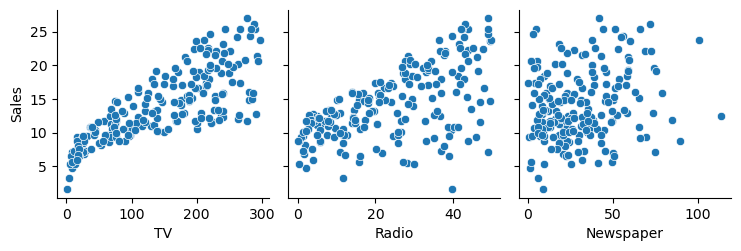

In [14]:
# Visualize the relationships between the features and the target variable

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

# Model Building

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop('Sales',axis =1)
y = df['Sales']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Create a dictionary of regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Train and evaluate regression models
for model_name, model in regression_models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    # Calculate evaluation metrics
    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)

    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Result

In [19]:
# Create a DataFrame to store the results
regression_scores_df = pd.DataFrame({
    "Algorithm": regression_models.keys(),
    "Mean Squared Error (MSE)": mse_scores,
    "Mean Absolute Error (MAE)": mae_scores,
    "R-squared (R2)": r2_scores
})

# Print the regression scores DataFrame
regression_scores_df

,Algorithm,Mean Squared Error (MSE),Mean Absolute Error (MAE),R-squared (R2)
0,Linear Regression,3.174097,1.460757,0.899438
1,Ridge Regression,3.174095,1.460766,0.899438
2,Lasso Regression,3.143692,1.452202,0.900401
3,Decision Tree Regressor,1.475000,0.910000,0.953269
4,Random Forest Regressor,0.488012,0.575575,0.984539
5,Gradient Boosting Regressor,0.510270,0.614494,0.983834
